# Creating the datasets 

In [101]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
from scipy.stats import norm 
import statistics
import math 

In [102]:
samples = 1000
#Positions In array 
positions = np.arange(0,samples)

#Sorted set Construction
noise_line = np.random.randint(-samples,samples*2,samples).reshape((-1,1))
sorted_numbers = sorted(noise_line)

#Normal Distribution set Construction
mean = statistics.mean(positions) 
sd = statistics.stdev(positions) 
normal = norm.pdf(positions, mean, sd)*(samples**2)

#Exponential construction
exp_array = []
for i in positions:
    exp_array.append(math.exp(6*i/samples))
exp_array = np.array(exp_array)

#Storing in dictionary 
data_sets = {
    'Linear': (2*positions).reshape((-1,1)),
    'Sorted': sorted_numbers,
    'Normal Distribution': normal.reshape((-1,1)),
    'exponential': exp_array.reshape((-1,1))
}

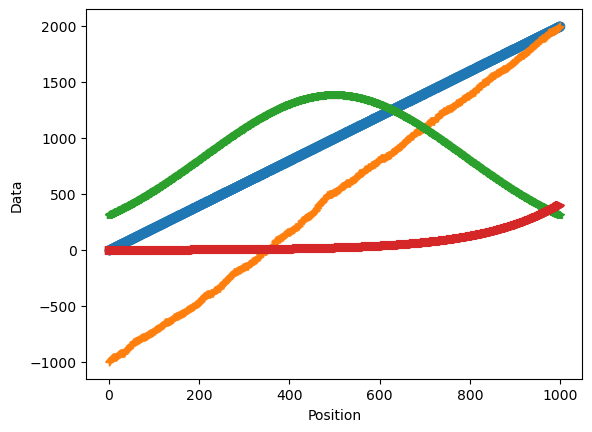

In [103]:
plt.plot(positions, data_sets['Linear'],'o')
plt.plot(positions, data_sets['Sorted'],'+')
plt.plot(positions, data_sets['Normal Distribution'],'*') 
plt.plot(positions, data_sets['exponential'],'>')
plt.xlabel('Position')
plt.ylabel('Data')
plt.show()

## Function that creates the histograms

In [104]:
def histogram (test, predictions, data_set):
    fig, ax = plt.subplots()
    fig.set_figheight(3)
    fig.set_figwidth(5)
    titles = ('0', '1', '2', '3', '4', '5-15', '15-50', '>=50')
    y_positions = np.arange(len(titles))
    performance = [0] * 8

    for i in range(len(test)):
        predictions[i] = round(predictions[i])
        j = 7
        if predictions[i] == test[i]:
            j=0
        elif predictions[i] + 1 == test[i] or predictions[i] - 1 == test[i]:
            j = 1
        elif predictions[i] + 2 == test[i] or predictions[i] - 2 == test[i]:
            j = 2
        elif predictions[i] + 3 == test[i] or predictions[i] - 3 == test[i]:
            j = 3
        elif predictions[i] + 4 == test[i] or predictions[i] - 4 == test[i]:
            j = 4
        elif predictions[i] + 15 > test[i] and predictions[i] - 15 < test[i]:
            j = 5
        elif predictions[i] + 50 > test[i] and predictions[i] - 50 < test[i]:
            j = 6

        performance[j] += 1

    ax.barh(y_positions, performance, color='green')
    ax.set_yticks(y_positions, labels=titles)
    ax.invert_yaxis() 
    ax.set_xlabel('Sums')
    ax.set_ylabel('Distanse of prediction')
    ax.set_title('Output accuracy '+ data_set + ' data set' )
    

# Regression Models

## Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [106]:
def linear_reg(x_train, x_test, y_train):
    linear_reg_model = LinearRegression().fit(x_train, y_train)
    y_predictions = linear_reg_model.predict(x_test)
    return linear_reg_model

In [107]:
testingSize = 0.2

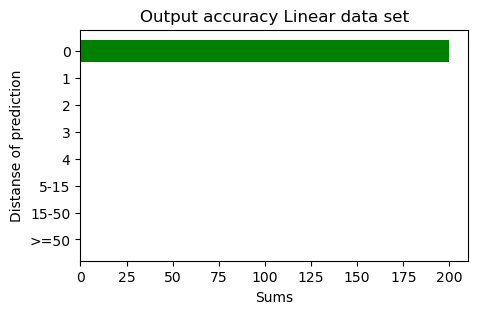

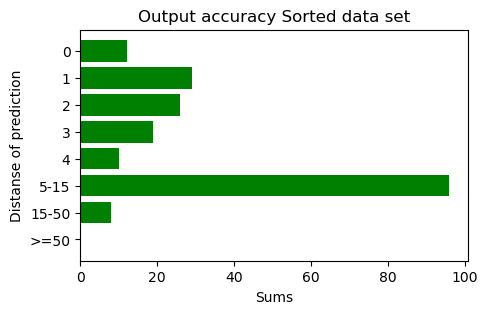

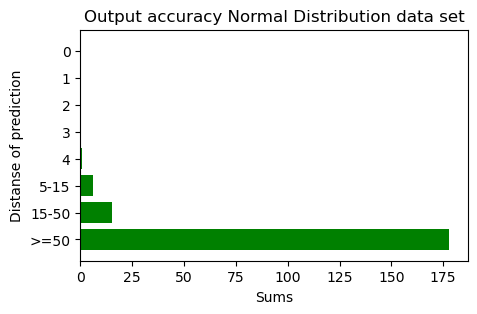

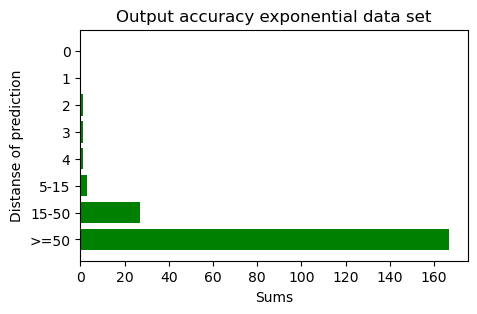

In [108]:
for i in data_sets:
    x_train, x_test, y_train, y_test = train_test_split(data_sets[i], positions, test_size=testingSize, random_state=0)
    #Linear reg
    prediction_model = linear_reg(x_train, x_test, y_train)
    histogram(y_test, prediction_model.predict(x_test), i)
plt.show()

## Polynomial Regression 

In [211]:
def plynomial_reg(x_train, x_test, y_train):
    polynomial = PolynomialFeatures(degree=5)
    poly_features = polynomial.fit_transform(x_train)

    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y_train)
    poly_test = polynomial.fit_transform(x_test)

    return poly_test, poly_reg_model

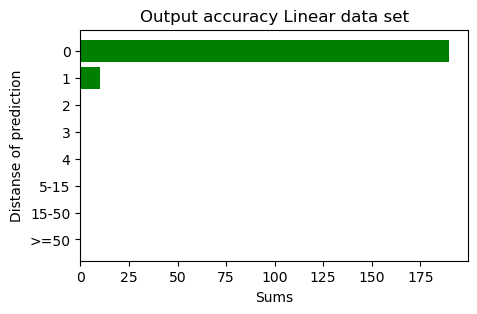

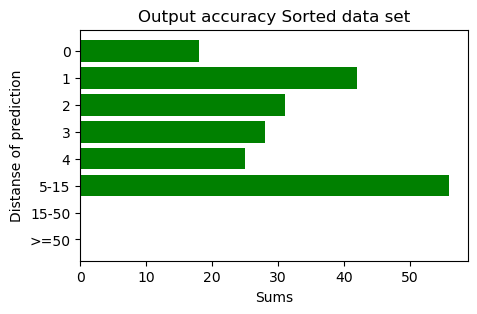

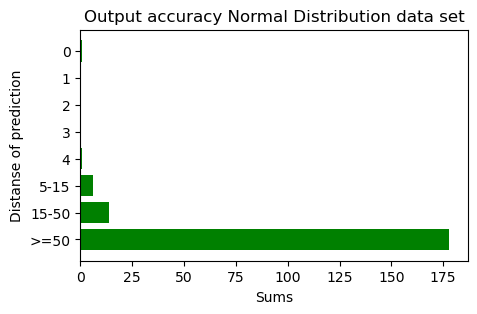

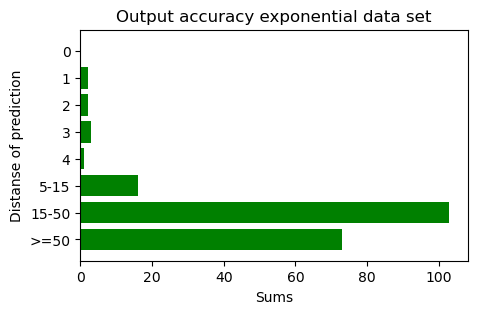

In [212]:
for i in data_sets:
    x_train, x_test, y_train, y_test = train_test_split(data_sets[i], positions, test_size=testingSize, random_state=0)
    test_set ,prediction_model = plynomial_reg(x_train, x_test, y_train)
    histogram(y_test, prediction_model.predict(test_set), i)
plt.show()

## Nearest Neighbors Regression 

In [247]:
def nearest_neighbors_reg(x_train, x_test, y_train):
    knn = neighbors.KNeighborsRegressor(n_neighbors=8 ,weights="uniform", algorithm = 'auto', leaf_size=50  )
    knn.fit(x_train, y_train)
    return knn

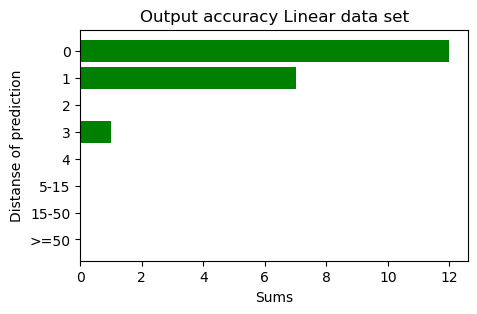

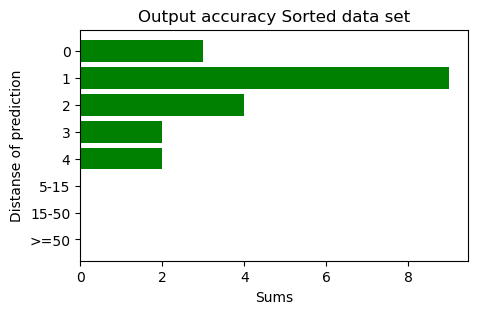

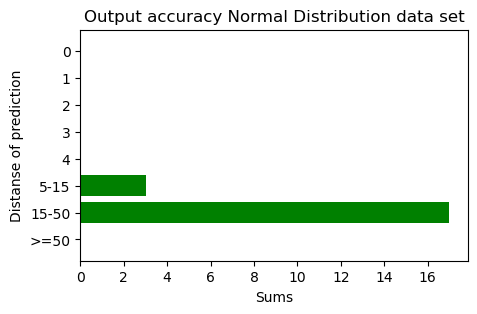

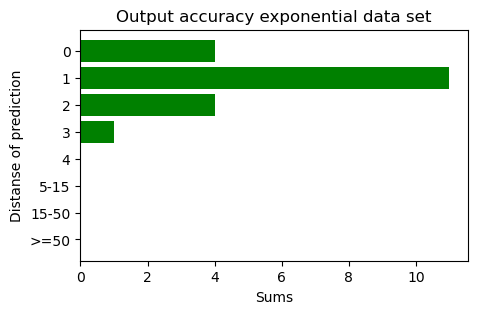

In [92]:
for i in data_sets:
    x_train, x_test, y_train, y_test = train_test_split(data_sets[i], positions, test_size=testingSize, random_state=0)
    prediction_model = nearest_neighbors_reg(x_train, x_test, y_train)
    histogram(y_test, prediction_model.predict(x_test), i)
plt.show()

## Decision Tree Regression 

In [157]:
def decision_tree_reg(x_train, x_test, y_train):
    d_tree = tree.DecisionTreeRegressor(criterion="absolute_error", max_depth=5)
    d_tree.fit(x_train, y_train)
    return d_tree

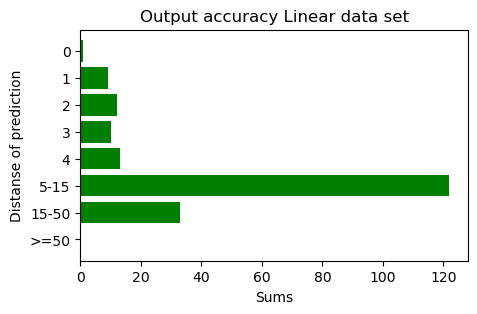

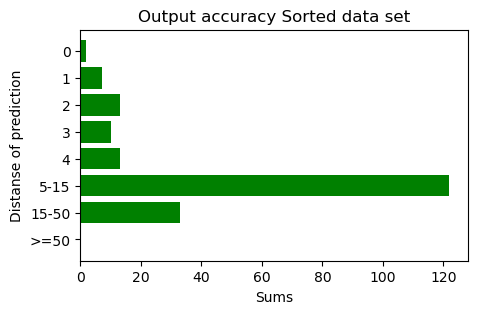

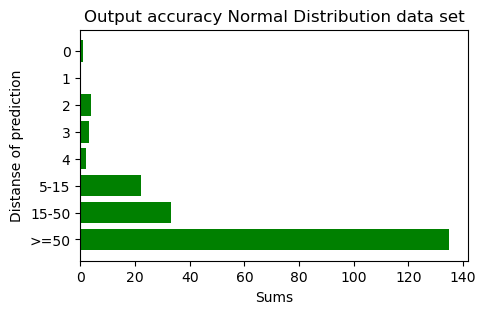

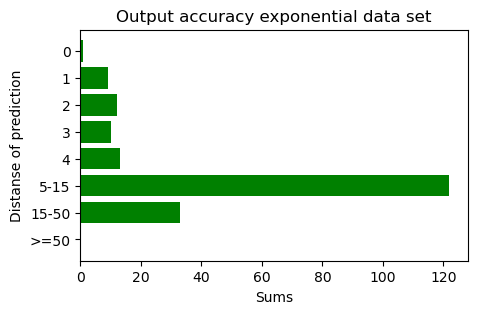

In [158]:
for i in data_sets:
    x_train, x_test, y_train, y_test = train_test_split(data_sets[i], positions, test_size=testingSize, random_state=0)
    prediction_model = decision_tree_reg(x_train, x_test, y_train)
    histogram(y_test, prediction_model.predict(x_test),i)
plt.show()

## Gaussian Regression

In [245]:
def gaussian_reg(x_train, x_test, y_train):
    krnl = RBF(length_scale=1.0, length_scale_bounds="fixed")
    gaussian_model = GaussianProcessRegressor(kernel=krnl, random_state=500,optimizer="fmin_l_bfgs_b",alpha=1e-11)
    gaussian_model.fit(x_train, y_train)
    return gaussian_model

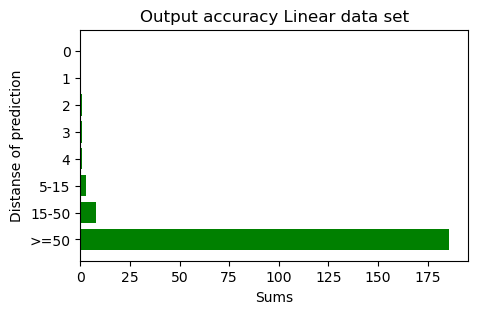

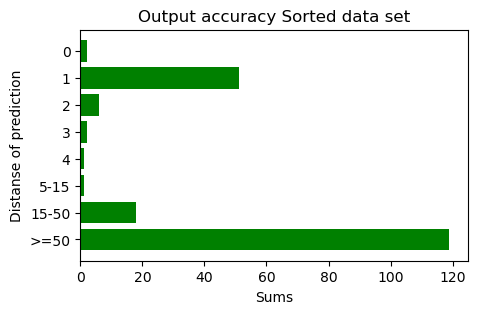

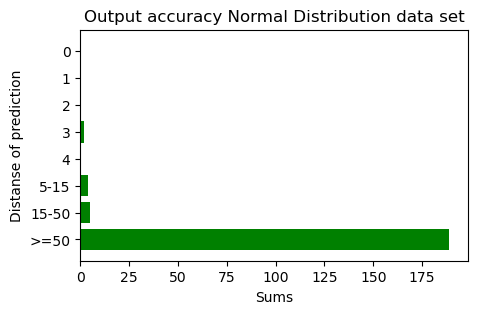

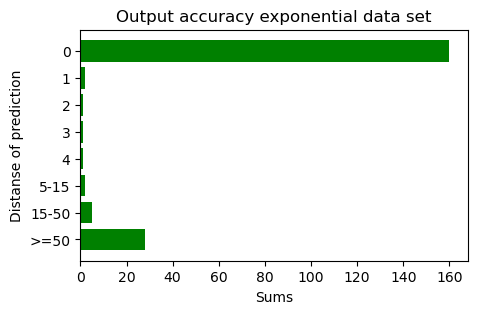

In [246]:
for i in data_sets:
    x_train, x_test, y_train, y_test = train_test_split(data_sets[i], positions, test_size=testingSize, random_state=1)
    prediction_model = gaussian_reg(x_train, x_test, y_train)
    histogram(y_test, prediction_model.predict(x_test),i)
plt.show()